In [101]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics 
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import random

In [102]:
import seaborn as sns

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("talk")

In [8]:
iris = datasets.load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
print(iris.feature_names)
print(iris.target_names)
print(iris.target)
print(iris.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ======

In [53]:
iris_df = DataFrame(iris.data)
#iris_df.columns = iris.feature_names
iris_df[4] = iris.target
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
#iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])

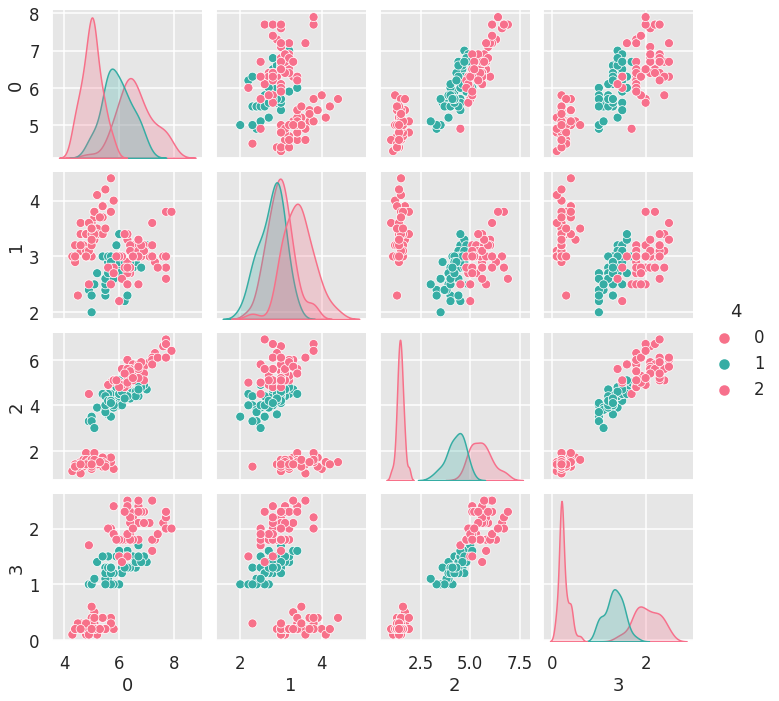

In [54]:
sns.pairplot(iris_df[[0, 1, 2, 3, 4]], hue = 4, palette="husl")

In [55]:
corr = iris_df.iloc[:,:4].corr()

In [56]:
corr

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


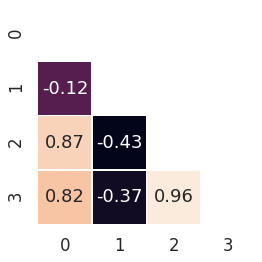

In [57]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

In [60]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris_df.iloc[:,:4], iris_df[4], test_size = 0.3, random_state = 1)

In [61]:
model = linear_model.SGDClassifier(random_state=0)

In [62]:
model.fit(train_data, train_labels)

SGDClassifier(random_state=0)

In [63]:
model_predictions = model.predict(test_data)

In [64]:
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.6
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        14
           1       0.00      0.00      0.00        18
           2       0.65      1.00      0.79        13

    accuracy                           0.60        45
   macro avg       0.40      0.67      0.50        45
weighted avg       0.36      0.60      0.45        45



/home/artem/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14  0  0]
 [11  0  7]
 [ 0  0 13]]


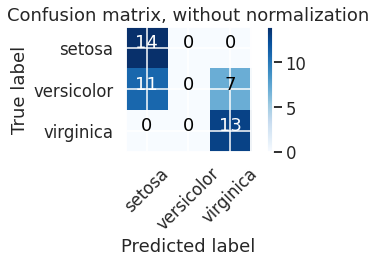

In [66]:
cnf_matrix = confusion_matrix(test_labels, model_predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["setosa","versicolor", "virginica"],
                      title='Confusion matrix, without normalization')

In [24]:
from scipy import polyval, stats
fit_output = stats.linregress(iris_df[['petal length (cm)','petal width (cm)']])
slope, intercept, _, _, _ = fit_output
print(slope, intercept)

0.4157554163524111 -0.36307552131902754


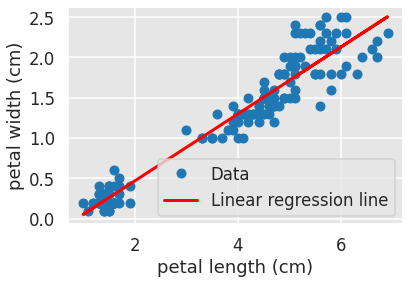

In [25]:
plt.plot(iris_df[['petal length (cm)']], iris_df[['petal width (cm)']],'o', label='Data')
plt.plot(iris_df[['petal length (cm)']], intercept + slope*iris_df[['petal length (cm)']], 'r', linewidth=3, label='Linear regression line')
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()

In [67]:
model = linear_model.LogisticRegression(random_state = 0)
scores = model_selection.cross_val_score(model, train_data, train_labels, cv=10)
print(scores.mean())

0.9709090909090909


/home/artem/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
model.fit(train_data, train_labels)

LogisticRegression(random_state=0)

In [69]:
scores = model.predict(test_data)

Confusion matrix, without normalization
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


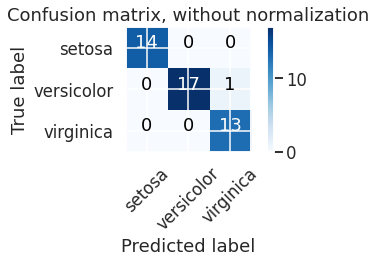

In [70]:
cnf_matrix = confusion_matrix(test_labels, scores)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["setosa","versicolor", "virginica"],
                      title='Confusion matrix, without normalization')

In [71]:
print(metrics.accuracy_score(test_labels, scores))
print(metrics.classification_report(test_labels, scores))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [31]:
iris_df['petal_area'] = 0.0
for k in range(0,150):
    iris_df['petal_area'][k] = iris_df['petal length (cm)'][k] * iris_df['petal width (cm)'][k]

<ipython-input-31-9b342a1306ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['petal_area'][k] = iris_df['petal length (cm)'][k] * iris_df['petal width (cm)'][k]


In [32]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris_df[['petal_area']], iris_df['target'], test_size = 0.3)
model2 = linear_model.LogisticRegression(random_state = 0)
scores2 = model_selection.cross_val_score(model2, train_data, train_labels, cv=10)
print(scores2.mean())

0.9636363636363636


In [33]:
model2.fit(train_data, train_labels)

LogisticRegression(random_state=0)

In [34]:
scores3 = model2.predict(test_data)

Confusion matrix, without normalization
[[16  0  0]
 [ 0 13  0]
 [ 0  2 14]]


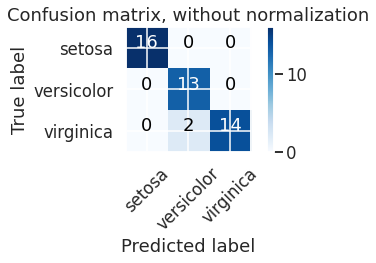

In [35]:
cnf_matrix = confusion_matrix(test_labels, scores3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["setosa","versicolor", "virginica"],
                      title='Confusion matrix, without normalization')

In [36]:
print(metrics.accuracy_score(test_labels, scores3))
print(metrics.classification_report(test_labels, scores3))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      1.00      0.93        13
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [72]:
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
def grad(func, args, arg_num, eps=5e-3):  #Вычисление градиента
    f_x=func(args)
    args[arg_num] += eps
    f_x_dx=func(args)
    res = (f_x_dx-f_x)/eps
    return res

In [104]:
def model(args, values): #Линейная функция отклика
    res = 0
    for i in range(4):
        res += args[i]*values[i]
    res += args[-1]
    return res

In [108]:
def mse(args, func=model):
    res = 0
    values = [0, 0, 0, 0, 0, 0]
    for i in range(150):   
        for j in range(4):
            values[j] = iris_df.iloc[i,j]
 #       y_i = func(args, values)
        y_i = round(func(args, values))
        y_i_real = iris_df.iloc[i,4]
        res += (y_i - y_i_real)**2
    return res / 150

In [117]:
class StohasticRegression:
    def __init__(self):
        pass
    
    def initialize(self, func, loss, parameters):
        self.function = func
        self.loss = loss
        self.parameters = parameters
    
class Training:
    def __init__(self, data):
        self.data = data
        self.regression = StohasticRegression()
        
    def setData(self, data):
        self.data = data

    def setFunction(self, func):
        self.regression.function = func
        
    def setLoss(self, loss):
        self.regression.loss = loss
        
    def setParameters(self, parameters):
        self.regression.parameters = parameters
    
        
    def trainFunction(self, steps=10, step=0.1, eps=1e-3):
        x = self.regression.parameters
        for i in range(steps):
            if i % 10 == 0:
                print("Step " + str(i))
                print("Meaning = ", str(self.regression.loss(x, self.regression.function)))    
            arg_num = random.randint(0, len(x)-1)
            gr = grad(self.regression.loss, x, arg_num, eps)
            x[arg_num] -= step*gr
        self.regression.parameters = x
        
    def getResults(self):
        return self.regression.parameters

In [126]:
a = Training(iris_df)
a.setData(iris_df)
a.setFunction(model)
a.setLoss(mse)
a.setParameters([1, 1, 1, 1, 3])
a.trainFunction(100, 0.001, 1e-4)

print(a.getResults())

Step 0
Meaning =  256.53333333333336
Step 10
Meaning =  13.94
Step 20
Meaning =  13.94
Step 30
Meaning =  13.94
Step 40
Meaning =  13.94
Step 50
Meaning =  13.94
Step 60
Meaning =  13.94
Step 70
Meaning =  13.94
Step 80
Meaning =  13.94
Step 90
Meaning =  21.22
[1.1351333333333185, 1.0015999999999998, 1.0021999999999998, 1.0025999999999997, -15.731533333333353]


In [130]:
def coincidence_number(func, args):
    result = list()
    counter = 0
    for i in range(150):      
        values = [0, 0, 0, 0]
        for j in range(4):
            values[j] = iris_df.iloc[i,j]
        res = func(args, values)
        real_res = iris_df.iloc[i,4]
        result.append([res, real_res])
        print(res, real_res)
        if(res == real_res):
            counter += 1
    print(str(counter / 150 * 100) + " %")
    return result


result = DataFrame(coincidence_number(model, a.getResults()))
result

-4.833153333333431 0
-5.560980000000095 0
-5.687906666666757 0
-5.701140000000089 0
-4.846506666666762 0
-3.5907933333334334 0
-5.400620000000091 0
-4.946606666666764 0
-6.228706666666753 0
-5.460860000000093 0
-4.192073333333434 0
-5.073413333333427 0
-5.774753333333425 0
-6.642980000000083 0
-3.7382000000001074 0
-2.9498933333334385 0
-3.991673333333434 0
-4.732893333333431 0
-3.450673333333439 0
-4.33219333333343 0
-4.292113333333434 0
-4.332093333333431 0
-5.701440000000089 0
-4.432033333333429 0
-4.772753333333426 0
-5.247026666666763 0
-4.6458666666667625 0
-4.619420000000099 0
-4.8198000000000984 0
-5.387246666666757 0
-5.373893333333426 0
-4.292033333333434 0
-4.118720000000097 0
-3.677980000000103 0
-5.360600000000094 0
-5.447586666666764 0
-4.4793200000001026 0
-5.060280000000093 0
-6.228766666666752 0
-4.833093333333432 0
-4.946626666666763 0
-6.716113333333421 0
-6.028446666666753 0
-4.345186666666763 0
-3.831053333333429 0
-5.574233333333426 0
-4.332233333333431 0
-5.70120

,0,1
0,-4.833153,0
1,-5.560980,0
2,-5.687907,0
3,-5.701140,0
4,-4.846507,0
...,...,...
145,2.396080,2
146,0.839747,2
147,1.868273,2
148,2.429593,2


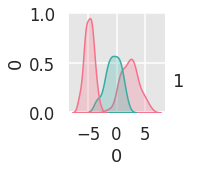

In [131]:
sns.pairplot(result[[0, 1]], hue = 1, palette="husl")